In [136]:
import numpy as np
import matplotlib.pyplot as plt
import torch
# lav en samlet generator, omform til pytorch.

def IRM_graph(alpha, a, b, N):
    clusters=CRP(alpha, N)
    phis=Phi(clusters,a,b)
    Adj=Adj_matrix(phis,clusters)
    return Adj, clusters

# Perform Chinese Restaurant Process
def CRP(alpha, N):
    # First seating
    clusters = [[1]]
    for i in range(2, N + 1):
        # Calculate cluster assignment as index to the list clusters.
        p = np.random.uniform(0, 1)
        probs = np.array([len(cluster) / (i + alpha-1) for cluster in clusters])
        cluster_assignment = sum(np.cumsum(probs) < p)
        
        # Make new table or assign to current
        if cluster_assignment == len(clusters):
            clusters.append([i])
        else:
            clusters[cluster_assignment].append(i)
    
    # Return the cluster sizes
    return np.array([len(cluster) for cluster in clusters])

# Return a symmetric matrix of cluster probabilities,
# defined by a beta distribution.
def Phi(clusters, a, b):
    n = len(clusters)
    phis = np.random.beta(a,b,(n,n))
    # Symmetrize
    for i in range(n-1,-1,-1):
        for j in range(n):
            phis[i,j]=phis[j,i]
    
    return phis

# Helper function to construct block matrix of cluster probabilities.
def make_block_phis(phis, clusters):
    for i, ii in enumerate(clusters):
        for j, jj in enumerate(clusters):
            if j==0:
                A=np.full((ii,jj),phis[i,j])
            else:
                A=np.hstack((A,np.full((ii,jj),phis[i,j])))

        if i==0:
            block_phis=A
        else:
            block_phis=np.vstack((block_phis,A))
    
    return block_phis

# Construct adjacency matrix.
def Adj_matrix(phis, clusters):
    n=sum(clusters)
    Adj_matrix=np.zeros((n,n))
    
    block_phis=make_block_phis(phis,clusters)
    
    # Iterate over all nodes and cluster probabilities.
    for i in range(n):
        for j in range(n):
            p=np.random.rand()
            if p<block_phis[i,j]:
                Adj_matrix[i,j]=1
                Adj_matrix[j,i]=1
            else:
                Adj_matrix[i,j]=0
                Adj_matrix[j,i]=0
    
    return Adj_matrix



[37  6 10 13 35  5  6  6  1  8  1 12  9  9 14  2  4  2  4  1  1  1  2  4
  1  2  1  1  1  1]


<Figure size 640x480 with 0 Axes>

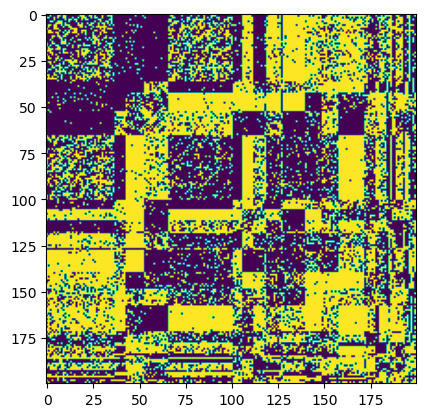

<Figure size 640x480 with 0 Axes>

In [135]:
adj, clus=IRM_graph(10,0.5,0.5,200)
print(clus)
plt.imshow(adj)
plt.figure()


In [160]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.distributions import Beta

def IRM_graph(alpha, a, b, N):
    clusters=CRP(alpha, N)
    phis=Phi(clusters,a,b)
    Adj=Adj_matrix(phis,clusters)
    return Adj, clusters

# Perform Chinese Restaurant Process
def CRP(alpha, N):
    # First seating
    clusters = [[1]]
    for i in range(2, N + 1):
        # Calculate cluster assignment as index to the list clusters.
        p = torch.rand(1)
        probs = torch.tensor([len(cluster) / (i + alpha-1) for cluster in clusters])
        cluster_assignment = sum(torch.cumsum(probs, dim=0) < p)
        
        # Make new table or assign to current
        if cluster_assignment == len(clusters):
            clusters.append([i])
        else:
            clusters[cluster_assignment].append(i)
    
    # Return the cluster sizes
    return torch.tensor([len(cluster) for cluster in clusters])

# Return a symmetric matrix of cluster probabilities,
# defined by a beta distribution.
def Phi(clusters, a, b):
    n = len(clusters)
    phis = Beta(a,b).rsample((n,n))
    # Symmetrize
    for i in range(n-1,-1,-1):
        for j in range(n):
            phis[i,j]=phis[j,i]
    
    return phis

# Helper function to construct block matrix of cluster probabilities.
def make_block_phis(phis, clusters):
    for i, ii in enumerate(clusters):
        for j, jj in enumerate(clusters):
            if j==0:
                A=torch.full((ii,jj),phis[i,j])
            else:
                A=torch.hstack((A,torch.full((ii,jj),phis[i,j])))

        if i==0:
            block_phis=A
        else:
            block_phis=torch.vstack((block_phis,A))
    
    return block_phis

# Construct adjacency matrix.
def Adj_matrix(phis, clusters):
    n=sum(clusters)
    Adj_matrix=torch.zeros((n,n))
    
    block_phis=make_block_phis(phis,clusters)
    
    # Iterate over all nodes and cluster probabilities.
    for i in range(n):
        for j in range(n):
            p=torch.rand(1)
            if p<block_phis[i,j]:
                Adj_matrix[i,j]=1
                Adj_matrix[j,i]=1
            else:
                Adj_matrix[i,j]=0
                Adj_matrix[j,i]=0
    
    return Adj_matrix



tensor([ 3,  9, 11, 57,  1,  3, 15, 14,  6,  5,  4, 19,  7,  9,  7,  3,  3,  3,
         5,  1,  1,  1,  1,  1,  2,  1,  1,  3,  2,  1,  1])


<Figure size 640x480 with 0 Axes>

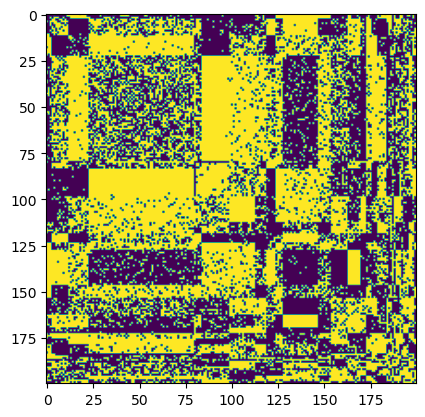

<Figure size 640x480 with 0 Axes>

In [161]:
adj, clus=IRM_graph(10,0.5,0.5,200)
print(clus)
plt.imshow(adj)
plt.figure()

In [167]:
torch.rand(1)

tensor([0.4573])